<a href="https://colab.research.google.com/github/Nsimaar99/Nsima-Project/blob/master/Titan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Define the file paths for the train and test datasets in Google Colab
train_file_path = '/content/train.csv'
test_file_path = '/content/train.csv'

# Load the training and testing data using pandas
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Preview the first few rows of the train and test datasets
print("Train data:")
print(train_df.head())

print("\nTest data:")
print(test_df.head())
print(test_df.head())

Train data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

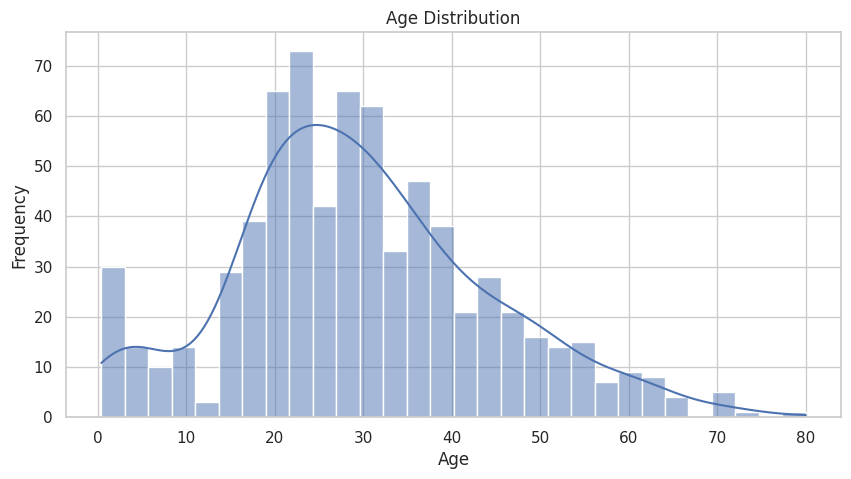

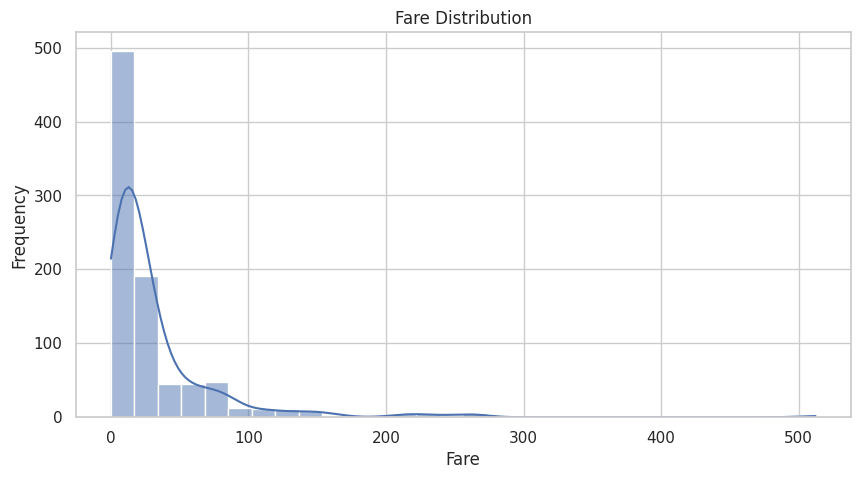

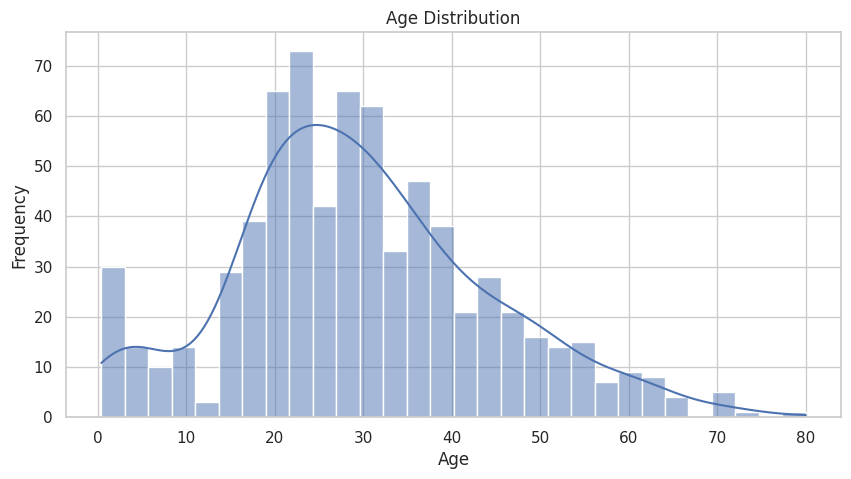

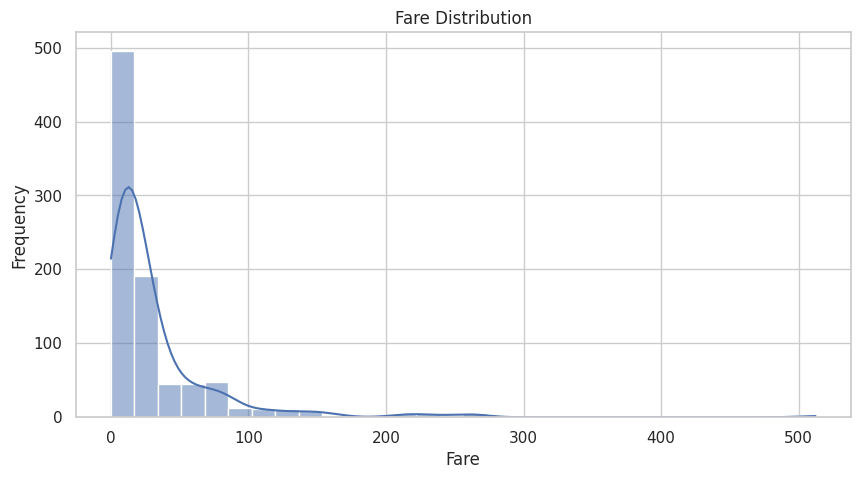

In [5]:
# Import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Add this line to import seaborn and alias it as sns

# Set style
sns.set(style='whitegrid')

# Plot Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Fare'].dropna(), kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
sns.set(style='whitegrid')
# Plot Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Fare'].dropna(), kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

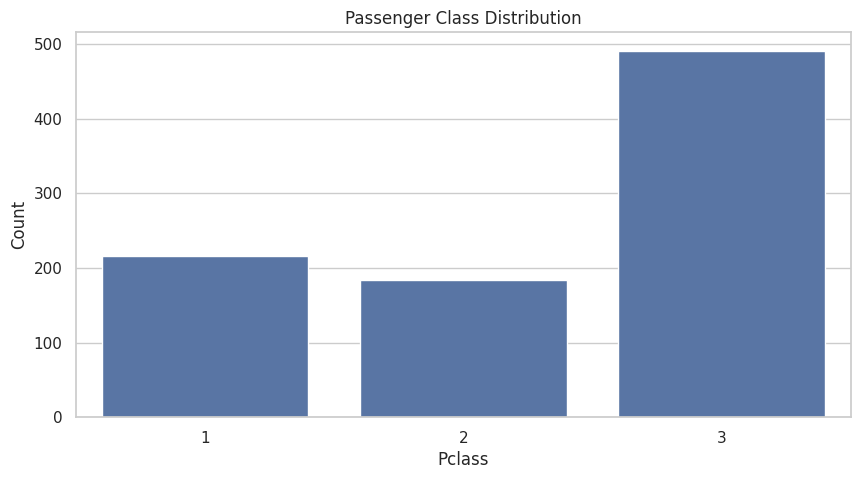

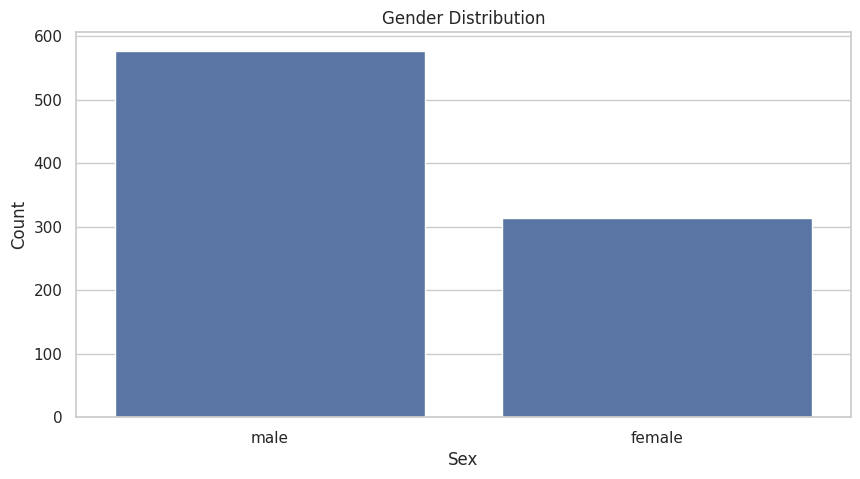

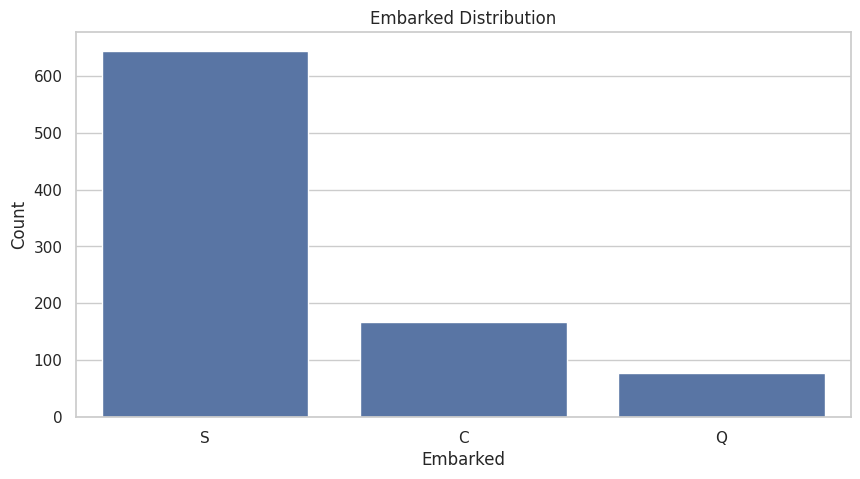

In [6]:
# Plot Pclass distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Plot Sex distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot Embarked distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=train_df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

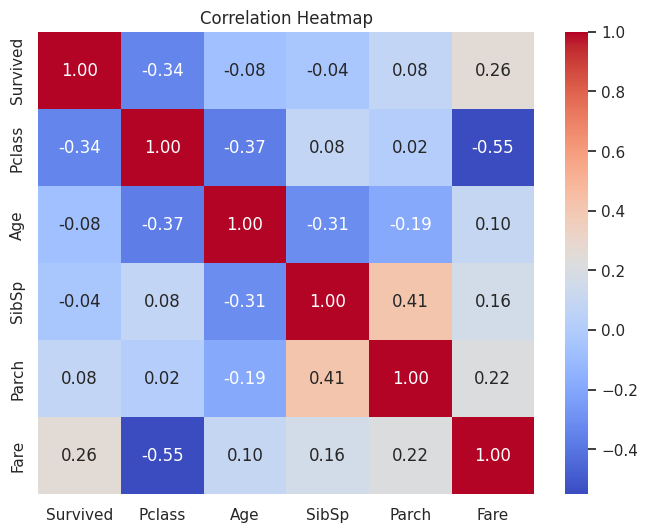

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Survived' column exists in train_df
if 'Survived' in train_df.columns:
  # Create a new column for survival as a numeric value
  train_df['Survived'] = train_df['Survived'].astype('int')

  # Compute correlation matrix
  corr_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

  # Plot heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap')
  plt.show()
else:
  print("Column 'Survived' not found in train_df")


In [10]:
# Check for missing values in both train and test datasets
print("Missing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming train_df and test_df are your datasets

# Check if 'Cabin' column exists before dropping
if 'Cabin' in train_df.columns:
    train_df.drop(columns=['Cabin'], inplace=True)
if 'Cabin' in test_df.columns:
    test_df.drop(columns=['Cabin'], inplace=True)

# Impute Age
age_imputer = SimpleImputer(strategy='median')
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])
test_df['Age'] = age_imputer.transform(test_df[['Age']])

# Impute Embarked
embarked_imputer = SimpleImputer(strategy='most_frequent')
# SimpleImputer.fit_transform returns a 2D array. We need to flatten it to a 1D array using .ravel()
train_df['Embarked'] = embarked_imputer.fit_transform(train_df[['Embarked']]).ravel()

# Impute Fare
fare_imputer = SimpleImputer(strategy='median')
test_df['Fare'] = fare_imputer.fit_transform(test_df[['Fare']])

In [19]:
print("Missing values in training dataset after imputation:")
print(train_df.isnull().sum())

print("Missing values in test dataset after imputation:")
print(test_df.isnull().sum())

Missing values in training dataset after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing values in test dataset after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [20]:
# Extracting titles from the Name column helps to categorize passengers by their salutation
import pandas as pd
import re

def extract_title(name):
    # Regular expression to extract titles
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return "Unknown"

# Apply the function to the 'Name' column in both datasets
train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

print("Training dataset with Titles:")
print(train_df[['Name', 'Title']].head())

print("Test dataset with Titles:")
print(test_df[['Name', 'Title']].head())

Training dataset with Titles:
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr
Test dataset with Titles:
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [21]:
# Define a mapping from specific titles to broader categories
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Ms': 'Miss',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Mlle': 'Miss',
    'Mme': 'Mrs'
}

# Apply the mapping
train_df['Title'] = train_df['Title'].map(title_mapping).fillna('Other')
test_df['Title'] = test_df['Title'].map(title_mapping).fillna('Other')

In [22]:
# Display the first few rows of the training dataset with the updated titles
print("Training dataset with updated Titles:")
print(train_df[['Name', 'Title']].head())

# Display the first few rows of the test dataset with the updated titles
print("Test dataset with updated Titles:")
print(test_df[['Name', 'Title']].head())

Training dataset with updated Titles:
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr
Test dataset with updated Titles:
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr
